# 1.) Import an asset price from Yahoo Finance

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


########################################
####Pick your ticker and time period####
########################################
stock_data = yf.download("AAPL", start="1990-01-01", end="2023-02-24")


# Preprocess data
scaled_data = np.array(stock_data["Close"].pct_change().dropna()).reshape(-1,1)


# Split data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]

[*********************100%***********************]  1 of 1 completed


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [3]:
#############################################################
####Pick your input size and edit to make binary forecast####
############################################################# 
input_size = 5      # number of time lag 

# # create x_train/y_train
# x_train = []
# y_train = []

# for i in range(input_size, len(train_data)):
#     x_train.append(train_data[i-input_size:i, 0])
#     y_train.append(np.where(train_data[i] >=0, 1, -1)) # 1 if it went up, 0 if it went down - classification

# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train

# Define function
def make_input(train_data, input_size):
    x_train = []
    y_train = []
    for i in range(input_size, len(train_data)):
        x_train.append(train_data[i-input_size:i, 0])
        y_train.append(np.where(train_data[i] >=0, 1, -1)) # 1 if it went up, 0 if it went down - classification
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train

x_train, y_train = make_input(train_data, input_size)
x_train

array([[[ 0.00671094],
        [ 0.00333617],
        [ 0.00332206],
        [ 0.00662204],
        [-0.00986776]],

       [[ 0.00333617],
        [ 0.00332206],
        [ 0.00662204],
        [-0.00986776],
        [-0.04318949]],

       [[ 0.00332206],
        [ 0.00662204],
        [-0.00986776],
        [-0.04318949],
        [-0.0416671 ]],

       ...,

       [[-0.0280957 ],
        [-0.01456103],
        [ 0.01684045],
        [ 0.00865483],
        [ 0.01271183]],

       [[-0.01456103],
        [ 0.01684045],
        [ 0.00865483],
        [ 0.01271183],
        [ 0.00303348]],

       [[ 0.01684045],
        [ 0.00865483],
        [ 0.01271183],
        [ 0.00303348],
        [-0.00938577]]])

In [4]:
###################################
####Build Your RNN Architecture####
###################################
# model (1)
# model = Sequential()
# model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(x_train.shape[1], input_shape=(x_train.shape[1], 1)))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(1, activation='sigmoid')) # last layer should correspond to classification sigmoid/softmax

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, batch_size=1, epochs=3)

# model (2)
model = Sequential()
model.add(LSTM(x_train.shape[1], input_shape=(x_train.shape[1], 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # last layer should correspond to classification sigmoid/softmax

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
6675/6675 [==============================] - 25s 3ms/step - loss: 1.0054
Epoch 2/3
6675/6675 [==============================] - 24s 4ms/step - loss: 0.9992
Epoch 3/3
6675/6675 [==============================] - 25s 4ms/step - loss: 0.9981


In [5]:
# Look at the predictions
predictions_in = model.predict(x_train)
print(predictions_in)

# Find the best threshold (criteria: accuracy)
from sklearn.metrics import accuracy_score

threshold = []
accuracy = []

for th in np.arange(0.02, 0.09, 0.0001):
    y_pred_in = np.where(predictions_in > th, 1, 0)
    threshold.append(th)
    accuracy.append(accuracy_score(y_train, y_pred_in))

threshold_f = pd.DataFrame(list(zip(accuracy)), index=threshold).idxmax()[0]
print('threshold: ', threshold_f)

209/209 [==============================] - 1s 2ms/step
[[0.03061132]
 [0.03107343]
 [0.03130232]
 ...
 [0.03042584]
 [0.03041265]
 [0.0305466 ]]
threshold:  0.02


# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [6]:
# fit the model to the test data
test_data = scaled_data[training_data_len - input_size:, :]
x_test, y_test = make_input(test_data, input_size)

# make predictions
predictions_in = model.predict(x_train)  # probability
y_pred_in = np.where(predictions_in > threshold_f, 1, 0)
predictions_out = model.predict(x_test)  # probability
y_pred = np.where(predictions_out > threshold_f, 1, 0)

# random walk predictions (random walk assumes the price change to be 0, which is classified as 1 in our model)
y_rw_in = np.ones(len(y_pred_in))
y_rw = np.ones(len(y_pred))

# accuracy scores
acc_in = accuracy_score(y_train, y_pred_in)
acc_in_rw = accuracy_score(y_train, y_rw_in)
acc_out = accuracy_score(y_test, y_pred)
acc_out_rw = accuracy_score(y_test, y_rw)

53/53 [==============================] - 0s 3ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


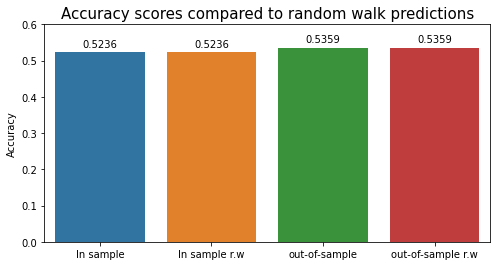

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array(['In sample', 'In sample r.w', 'out-of-sample', 'out-of-sample r.w'])
y = np.array([acc_in, acc_in_rw, acc_out, acc_out_rw])

### Plot
# Defining the plot size
plt.figure(figsize=(8, 4))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x, y)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=10)
plt.ylim(0,0.6)
 
# Setting the title for the graph
plt.title("Accuracy scores compared to random walk predictions", size=15)
 
# Finally showing the plot
plt.show()

# 4.) Plot in and out of sample accuracy - DON'T DO IT

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on full dataset

test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

train_predict = model.predict(x_train)
train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)



plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
end_val = np.cumprod(y_train+1)[-1]
test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

#5.) Write an observation/conclusion about the graphs from Q4 and Q3

The LSTM model performed poorly and had the same accuracy scores as the random walk predictions. 

# 6.) Create a parameter for number of lags in your input layer. Do a 3-fold CV to test three different time lags. i.e. Tested using 5,10,20 days of previous price data to forecast

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Define the Keras model
###Edit here to create your optimizer 
def create_model(input_size=input_size):
    x_train, y_train = make_input(train_data, input_size)
    model = Sequential()
    model.add(LSTM(x_train.shape[1], input_shape=(x_train.shape[1], 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # last layer should correspond to classification sigmoid/softmax
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.summary()
    return model

# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
# input_size = [5,10,20]
# optimizers = ['rmsprop', 'adam', 'Adamax', 'sgd']
# param_grid = dict(optimizer=optimizers)
# param_grid = dict(input_size=input_size, optimizer=optimizers)
param_grid={'input_size':[5,10,20]}

# Perform the grid search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train) 

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.523595 using {'input_size': 5}


In [12]:
################################################
##### TEST - OTHER HYPERPARAMETER
################################################

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Define the Keras model
###Edit here to create your optimizer 
def create_model(optimizer='adam'):
    x_train, y_train = make_input(train_data, 5)
    model = Sequential()
    model.add(LSTM(x_train.shape[1], input_shape=(x_train.shape[1], 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # last layer should correspond to classification sigmoid/softmax
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # model.summary()
    return model

# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
# input_size = [5,10,20]
optimizers = ['rmsprop', 'adam', 'Adamax', 'sgd']
param_grid = dict(optimizer=optimizers)
# param_grid = dict(input_size=input_size)
# param_grid={'input_size':[5,10,20]}

# Perform the grid search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.523595 using {'optimizer': 'rmsprop'}
